# Toxic Comment Classification
This notebook demonstrates a multi-label classification model for predicting six types of toxicity using TF-IDF and Logistic Regression.

## Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

from sklearn.multiclass import OneVsRestClassifier
import re


## Step 2: Load and Clean the Data

/var/folders/2n/0w23czwn2mjd3pg0c15vjyz80000gn/T/ipykernel_19351/3498420440.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["comment_text"].fillna("unknown", inplace=True)


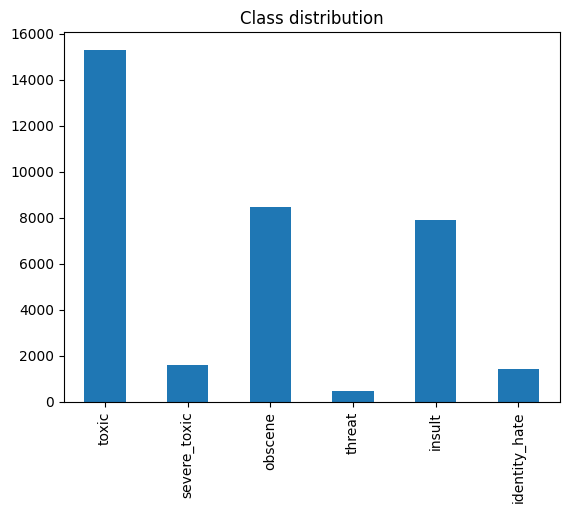

In [2]:
# Load data
df = pd.read_csv("/Users/anugrahrastogi21gmail.com/Downloads/comments.csv")

# Fill missing comments
df["comment_text"].fillna("unknown", inplace=True)

# Basic text cleaning
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)  # remove special chars
    text = re.sub(r"\s+", " ", text).strip()    # remove extra whitespace
    return text

df["clean_text"] = df["comment_text"].apply(clean_text)

# Display class distribution
label_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
df[label_cols].sum().plot(kind="bar", title="Class distribution")
plt.show()


## Step 3: Split the Data

In [3]:
X = df["clean_text"]
y = df[label_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Step 4: TF-IDF Vectorization

In [4]:
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1, 2), stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


## Step 5: Train One-vs-Rest Logistic Regression

In [5]:
model = OneVsRestClassifier(LogisticRegression(solver='liblinear', C=1.0))
model.fit(X_train_tfidf, y_train)


OneVsRestClassifier(estimator=LogisticRegression(solver='liblinear'))

## Step 6: Evaluate the Model

In [6]:
y_pred = model.predict(X_test_tfidf)

for i, label in enumerate(label_cols):
    print(f"\nClassification report for {label}:")
    print(classification_report(y_test.iloc[:, i], y_pred[:, i], zero_division=0))



Classification report for toxic:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     28859
           1       0.90      0.61      0.73      3056

    accuracy                           0.96     31915
   macro avg       0.93      0.80      0.85     31915
weighted avg       0.95      0.96      0.95     31915


Classification report for severe_toxic:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     31594
           1       0.53      0.21      0.30       321

    accuracy                           0.99     31915
   macro avg       0.76      0.60      0.65     31915
weighted avg       0.99      0.99      0.99     31915


Classification report for obscene:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     30200
           1       0.91      0.62      0.74      1715

    accuracy                           0.98     31915
   macro avg     